CLASSIFICATION TASK: PROBLEM FORMULATION---Classification is like regression only that it does not deal with predictions but deals with classifying values to different categories. I simply have to do the same thing but make the outcome to be either 0 or 1.-----In this datset problem, I am to check if a set of staff are eligible for a loan or note by using a set of features to check if they are eligible (1) or not (0); this is the y hat

In [1]:
##QUESTION: HOW DO I KNOW THOSE THAT ARE CATEGORICAL CALUES AND THOSE CATEGORICAL VALUES I REALLY NEED TO CONVERT: 
#Answer: convert all because logistic or linear regression model does not work with strings

STEP 2: DATA COLLECTION AND IMPORTING NECESSARY TOOLS---Here, I import the necessary tools, and of course, the dataset

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
dataset = pd.read_csv('datasets/loan.csv')

STEP 3: DATA EXPLORATION---Here, I dive deep into the dataset to see how the datset is an to know what I am working on

In [3]:
dataset.head()

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,32,Male,Engineer,Bachelor's,Married,85000,720,Approved
1,45,Female,Teacher,Master's,Single,62000,680,Approved
2,28,Male,Student,High School,Single,25000,590,Denied
3,51,Female,Manager,Bachelor's,Married,105000,780,Approved
4,36,Male,Accountant,Bachelor's,Married,75000,710,Approved


In [4]:
dataset.shape

(61, 8)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              61 non-null     int64 
 1   gender           61 non-null     object
 2   occupation       61 non-null     object
 3   education_level  61 non-null     object
 4   marital_status   61 non-null     object
 5   income           61 non-null     int64 
 6   credit_score     61 non-null     int64 
 7   loan_status      61 non-null     object
dtypes: int64(3), object(5)
memory usage: 3.9+ KB


In [6]:
dataset.describe()

,age,income,credit_score
count,61.000000,61.000000,61.000000
mean,37.081967,78983.606557,709.836066
std,8.424755,33772.025802,72.674888
min,24.000000,25000.000000,560.000000
25%,30.000000,52000.000000,650.000000
50%,36.000000,78000.000000,720.000000
75%,43.000000,98000.000000,770.000000
max,55.000000,180000.000000,830.000000


REMARKS: Frm the breif data exploration, I discovered that this dataset contains 61 examples and 8 features,  with the y as loan_status which has a binary values of either 'Approved' or 'Denied'. None of the values in the dataset is null. There exists 5 categorical columns and 3 integer columns. Standard deviation is how spread out a set of numbers are from the average values(mean).

STEP 4: CONVERTING CATEGORICAL COLUMNS---Here, I will check if there exists categorical columns, then I will convert it, if any.

In [7]:
dataset.select_dtypes(include = 'object').columns

Index(['gender', 'occupation', 'education_level', 'marital_status',
       'loan_status'],
      dtype='object')

In [8]:
dataset['new_gender'] = pd.factorize(dataset.gender)[0]
dataset['new_occupation'] = pd.factorize(dataset.occupation)[0]
dataset['new_education_level'] = pd.factorize(dataset.education_level)[0]
dataset['new_marital_status'] = pd.factorize(dataset.marital_status)[0]
dataset['new_loan_status'] = dataset['loan_status'].map({'Approved': 1, 'Denied': 0})

In [9]:
dataset.head()

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status,new_gender,new_occupation,new_education_level,new_marital_status,new_loan_status
0,32,Male,Engineer,Bachelor's,Married,85000,720,Approved,0,0,0,0,1
1,45,Female,Teacher,Master's,Single,62000,680,Approved,1,1,1,1,1
2,28,Male,Student,High School,Single,25000,590,Denied,0,2,2,1,0
3,51,Female,Manager,Bachelor's,Married,105000,780,Approved,1,3,0,0,1
4,36,Male,Accountant,Bachelor's,Married,75000,710,Approved,0,4,0,0,1


REMARK: All columns are integers now. For the loan_status column, the 'Approved' values now have the value of 1, while the 'Denied' values now have the value of 0

In [10]:
del dataset['loan_status']

In [11]:
del dataset['occupation']

In [12]:
del dataset['education_level']

In [13]:
del dataset['marital_status']

In [14]:
dataset.head()

,age,gender,income,credit_score,new_gender,new_occupation,new_education_level,new_marital_status,new_loan_status
0,32,Male,85000,720,0,0,0,0,1
1,45,Female,62000,680,1,1,1,1,1
2,28,Male,25000,590,0,2,2,1,0
3,51,Female,105000,780,1,3,0,0,1
4,36,Male,75000,710,0,4,0,0,1


STEP 4: HANDLING MISSING VALUES---Here, I am to check if there exists any missing values in the dataset

In [15]:
dataset.isnull().values.any()

False

REMARK: There are no missing values

TODAY---REMAINING DATA EXPLORATION, SPLITTING OF DATA, SCALING OD DATA, AND PICKING THE MODEL
MONDAY IS FOR MODEL TRAINING AND FOR PREDICTION TOO AND FINALITY AND POSTING IT ON MY GITHUB ACCOUNT

STEP 5: DEEP DATA EXPLORATION---The aim is to know the columns that have high correlation with the target variable. I will achieve this using the seaborn heatmap

In [16]:
del dataset['gender']

In [17]:
dataset.head()

,age,income,credit_score,new_gender,new_occupation,new_education_level,new_marital_status,new_loan_status
0,32,85000,720,0,0,0,0,1
1,45,62000,680,1,1,1,1,1
2,28,25000,590,0,2,2,1,0
3,51,105000,780,1,3,0,0,1
4,36,75000,710,0,4,0,0,1


In [18]:
corr = dataset.corr()

<Axes: >

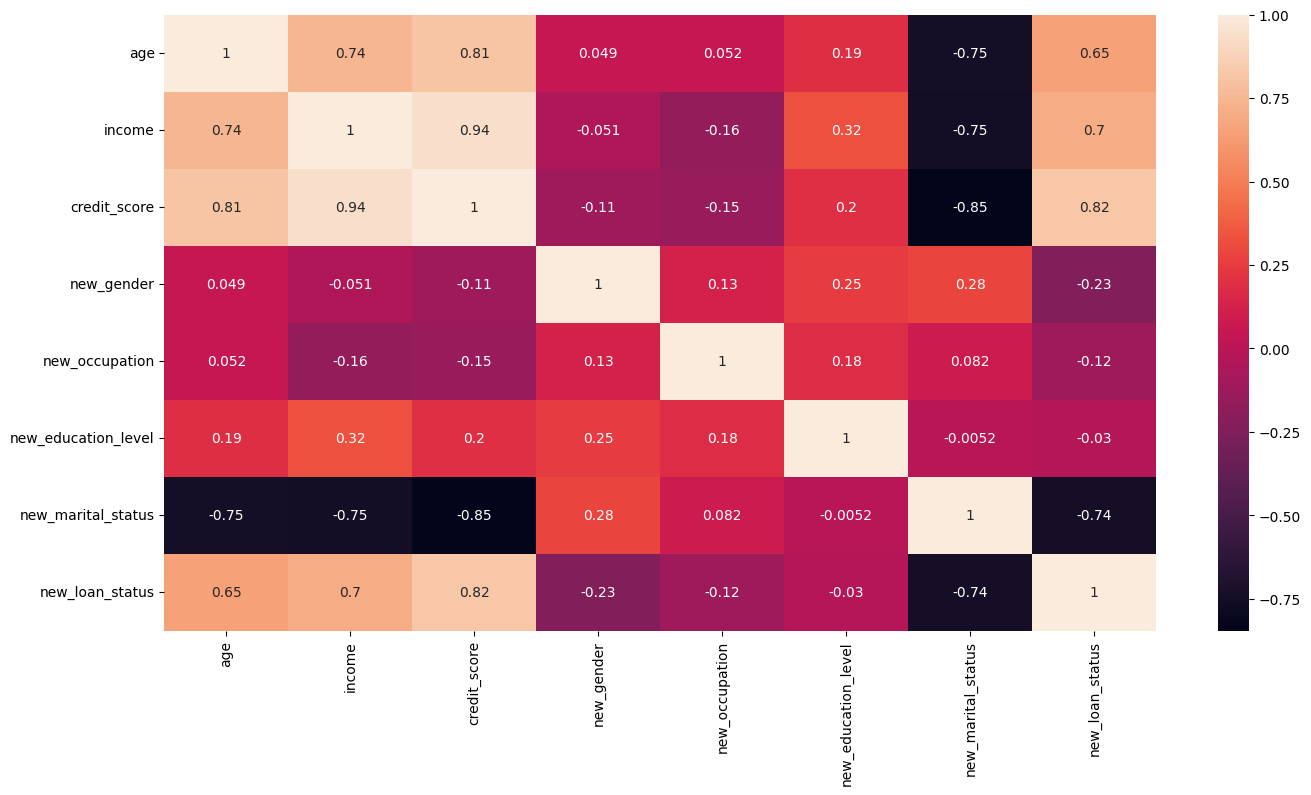

In [19]:
plt.figure(figsize=(16,8))
sns.heatmap(corr, annot=True)

REMARK: From the above, I observed that the new_marital_status has a very low correlation with the new_loan_status (the outcome). I also observed that credit_score has a very high correlation of 0.82 with the new_loan_status. 

THIS IS A MULTICLASS CLASSIFICAION PROBLEM
1. Plotting a scatter plot. If you have a dataset that 90% are not outliers, it is still good
2. 

1. Thursday: Checking all correlations, splitting of x and y
2. Friday: Importing logistic regression and fitting the model
3. Saturday: Checking the performance metrics and checking the new instance.

STEP 5B: CHECKING ALL CORRELATIONS

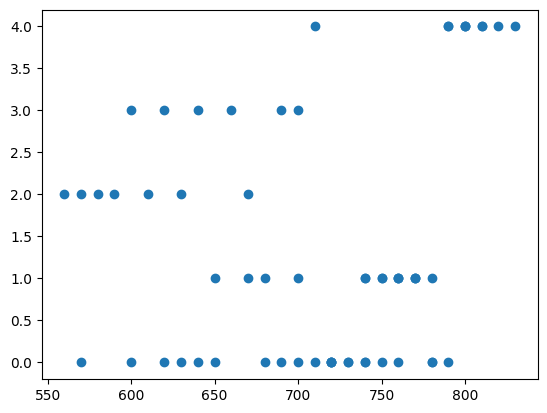

In [20]:
plt.scatter(dataset.credit_score, dataset.new_education_level)

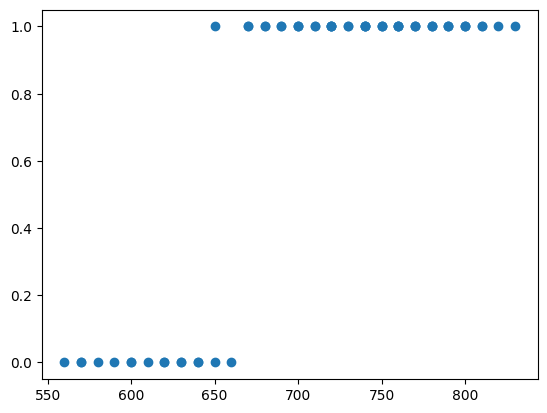

In [21]:
plt.scatter(dataset.credit_score, dataset.new_loan_status)

REMARK: I discovered that the more correlation a particular feature has with the target variable, the less the outliers

STEP 5C: PLOTTING A COUNT PLOT: This is to check the number of yes and the number of no that are found in the new_loan_status feature

<Axes: xlabel='count', ylabel='new_loan_status'>

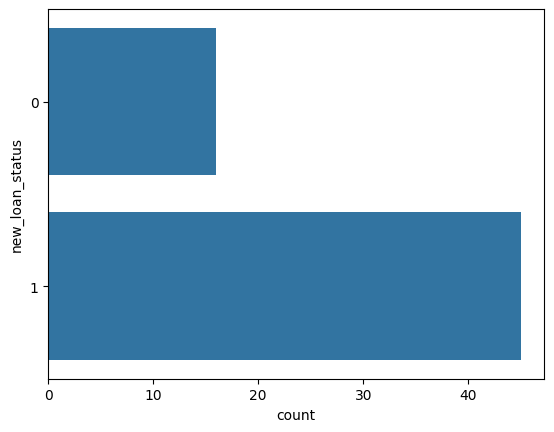

In [22]:
sns.countplot(y = 'new_loan_status', data = dataset)

REMARK: I discovered that the number of Positive classes are above 40, while the number of negative classes are above 10

STEP 6: SPLITTING INTO X AND Y

In [23]:
x = dataset.drop(columns = 'new_loan_status')

In [24]:
y = dataset['new_loan_status']

STEP 7: IMPORTING LOGISTIC REGRESSION AND FITTING THE MODEL

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0) #or train_size = 0.8

In [26]:
x_train.shape

(48, 7)

In [27]:
y_train.shape

(48,)

In [28]:
from sklearn.linear_model import LogisticRegression

In [31]:
model = LogisticRegression()

In [32]:
model.fit(x_train, y_train)

LogisticRegression()

In [33]:
y_hat = model.predict(x_test)

In [35]:
model.score(x_test, y_test)

0.9230769230769231

In [40]:
clf = LogisticRegression()
clf.fit(x_train, y_train)
clf._validate_params()
accuracy = clf.score(x_test, y_test)
print(accuracy)

0.9230769230769231


Therefore, the accuracy is ~92%